Imports and read dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import scipy.stats as stats

In [ ]:
df = pd.read_csv('/content/bloodtypes.csv')
df

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-
0,Albania,3074579,34.10,31.20,14.50,5.20,6.00,5.50,2.60,0.90
1,Algeria,43576691,40.00,30.00,15.00,4.25,6.60,2.30,1.10,0.75
2,Argentina,45479118,48.90,31.54,8.00,2.45,4.90,3.16,0.80,0.25
3,Armenia,3021324,29.00,46.30,12.00,5.60,2.00,3.70,1.00,0.40
4,Australia,25466459,38.00,32.00,12.00,4.00,7.00,6.00,2.00,1.00
...,...,...,...,...,...,...,...,...,...,...
121,Venezuela,28644603,58.30,28.20,5.60,1.90,3.70,1.80,0.40,0.10
122,Vietnam,98721275,41.70,21.90,30.80,4.98,0.30,0.10,0.20,0.02
123,Yemen,29884405,47.84,27.50,15.32,2.14,3.66,2.10,1.17,0.16
124,Zimbabwe,14546314,63.30,18.50,14.60,0.99,1.70,0.50,0.40,0.01


Data Preprocessing

In [ ]:
# types of data in df
df.dtypes

Country        object
Population      int64
O+            float64
A+            float64
B+            float64
AB+           float64
O-            float64
A-            float64
B-            float64
AB-           float64
dtype: object

In [ ]:
# null values finding
if df.isnull().sum().sum() ==0:
    print('There is no missing data in this dataset ')

else:
    print('There is {} missing data in this dataset'.format(df.isnull().sum().sum()))

There is 4 missing data in this dataset


In [ ]:
# number of diffrent countries in df
print('Number of unique country in this dataset:',df['Country'].nunique())
print('')
print('-'*1000)
print('')
print('unique country in this dataset:',df['Country'].unique())

Number of unique country in this dataset: 126

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# replacing all null values
from sklearn.impute import SimpleImputer

df['O-'] = SimpleImputer(strategy='mean').fit_transform(df['O-'].values.reshape(-1,1))
df['A-'] = SimpleImputer(strategy='mean').fit_transform(df['A-'].values.reshape(-1,1))
df['B-'] = SimpleImputer(strategy='mean').fit_transform(df['B-'].values.reshape(-1,1))
df['AB-'] = SimpleImputer(strategy='mean').fit_transform(df['AB-'].values.reshape(-1,1))

print(df.isnull().sum())

Country       0
Population    0
O+            0
A+            0
B+            0
AB+           0
O-            0
A-            0
B-            0
AB-           0
dtype: int64


Data analsis

In [ ]:
# mean population of all contries
data = df.groupby('Country')['Population'].sum()
average_data = data.mean()
average_data

119151499.1031746

In [ ]:
# Which blood type has the highest frequency among the population?
blood_types_counts = df.iloc[:, 2:].sum()

# Find the blood type with the highest frequency
highest_frequency_blood_type = blood_types_counts.idxmax()

print(highest_frequency_blood_type)

O+


In [ ]:
columns = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
#This code makes a new column that shows which blood type is common in these countries
df['Common']=df[columns].idxmax(axis=1)
#This code makes a new column that shows which blood type is Rare in these countries
df['Rare']=df[columns].idxmin(axis=1)

df.head()

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-,Common,Rare
0,Albania,3074579,34.1,31.20,14.5,5.20,6.0,5.50,2.6,0.90,O+,AB-
1,Algeria,43576691,40.0,30.00,15.0,4.25,6.6,2.30,1.1,0.75,O+,AB-
2,Argentina,45479118,48.9,31.54,8.0,2.45,4.9,3.16,0.8,0.25,O+,AB-
3,Armenia,3021324,29.0,46.30,12.0,5.60,2.0,3.70,1.0,0.40,A+,AB-
4,Australia,25466459,38.0,32.00,12.0,4.00,7.0,6.00,2.0,1.00,O+,AB-


In [ ]:
# Can you provide a breakdown of the blood types (positive and negative) in the dataset?
positive_blood_types_counts = df.iloc[:, 2:6].sum()

# Sum the counts for negative blood types (O-, A-, B-, AB-)
negative_blood_types_counts = df.iloc[:, 6:].sum()

# Create a breakdown dictionary for positive and negative blood types
blood_type_breakdown = {
    'Positive': positive_blood_types_counts.to_dict(),
    'Negative': negative_blood_types_counts.to_dict()
}

print(blood_type_breakdown)

{'Positive': {'O+': 5084.25, 'A+': 3737.7999999999993, 'B+': 2066.83, 'AB+': 608.22}, 'Negative': {'O-': 493.50672, 'A-': 412.92719999999997, 'B-': 168.1344, 'AB-': 62.53632, 'Common': 'O+O+O+A+O+A+A+O+B+O+O+O+O+A+O+A+O+O+O+O+O+O+O+O+A+O+A+A+O+A+O+O+A+O+A+O+O+A+A+O+O+A+O+O+O+O+O+A+O+B+O+O+B+O+A+O+O+O+A+O+O+O+O+A+O+O+A+O+A+O+O+A+O+O+O+A+O+O+O+O+A+O+O+O+O+A+A+A+B+O+O+O+O+A+A+A+O+O+A+O+A+A+O+O+A+O+A+O+A+A+O+O+O+O+A+O+A+O+O+O+A+O+O+O+O+O+', 'Rare': 'AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-B-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-O-AB-AB-AB-AB-B-AB-B-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-AB-'}}


In [ ]:
# What is the country with the largest population in the dataframe?
df.nlargest(1,'Population')

,Country,Population,O+,A+,B+,AB+,O-,A-,B-,AB-,Common,Rare
125,World,7772850805,37.37,27.24,22.83,6.22,2.69,2.09,1.16,0.4,O+,AB-


In [ ]:
# Are there any correlations between a country's population and the distribution of blood types?

correlation_matrix = df.corr()

# Extract the correlation values between 'Population' and the blood types
correlation_with_population = correlation_matrix['Population'][1:]

print(correlation_with_population)

O+    -0.034910
A+    -0.052302
B+     0.122362
AB+    0.116586
O-    -0.080583
A-    -0.078543
B-    -0.033882
AB-   -0.047308
Name: Population, dtype: float64


<ipython-input-12-7c674a0a4d55>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
# What is the total population of individuals with Rh-positive blood types (O+, A+, B+, AB+)?
blood_types_positive_counts = df.iloc[:, 2:6].sum()
Rh_blood_types_positive_counts = blood_types_positive_counts.sum()
Rh_blood_types_positive_counts

11497.099999999999

In [ ]:
# How many countries have a population below a certain threshold (e.g., 1 million)?
population_below = df.query('Population < 1000000')
count_population_below =  population_below.value_counts()
count_population_below

Country        Population  O+     A+     B+     AB+   O-    A-    B-    AB-   Common  Rare
Bhutan         857423      38.15  29.27  23.86  8.41  0.06  0.04  0.04  0.01  O+      AB-     1
Fiji           935974      43.00  33.30  16.50  4.80  1.00  0.70  0.50  0.20  O+      AB-     1
Iceland        350734      46.80  27.20  9.00   2.00  8.20  4.80  1.60  0.40  O+      AB-     1
Liechtenstein  39137       34.00  37.00  10.00  4.00  6.00  6.50  1.80  0.70  A+      AB-     1
Luxemburg      628381      35.00  37.00  9.00   4.00  6.00  6.00  2.00  1.00  A+      AB-     1
Macao          614458      41.50  26.10  25.40  6.30  0.33  0.17  0.15  0.05  O+      AB-     1
Malta          457267      38.00  41.00  7.00   3.00  5.00  4.50  1.00  0.50  A+      AB-     1
dtype: int64

In [ ]:
df['Rh_negative_count'] = df['O-'] + df['A-'] + df['B-'] + df['AB-']

# Calculate the percentage of Rh-negative individuals for each country
df['Rh_negative_percentage'] = (df['Rh_negative_count'] / df['Population']) * 100

# Check the correlation between population size and Rh-negative percentage
correlation = df['Population'].corr(df['Rh_negative_percentage'])

print(f"Correlation between population size and Rh-negative percentage: {correlation}")

Correlation between population size and Rh-negative percentage: -0.024131335828068895


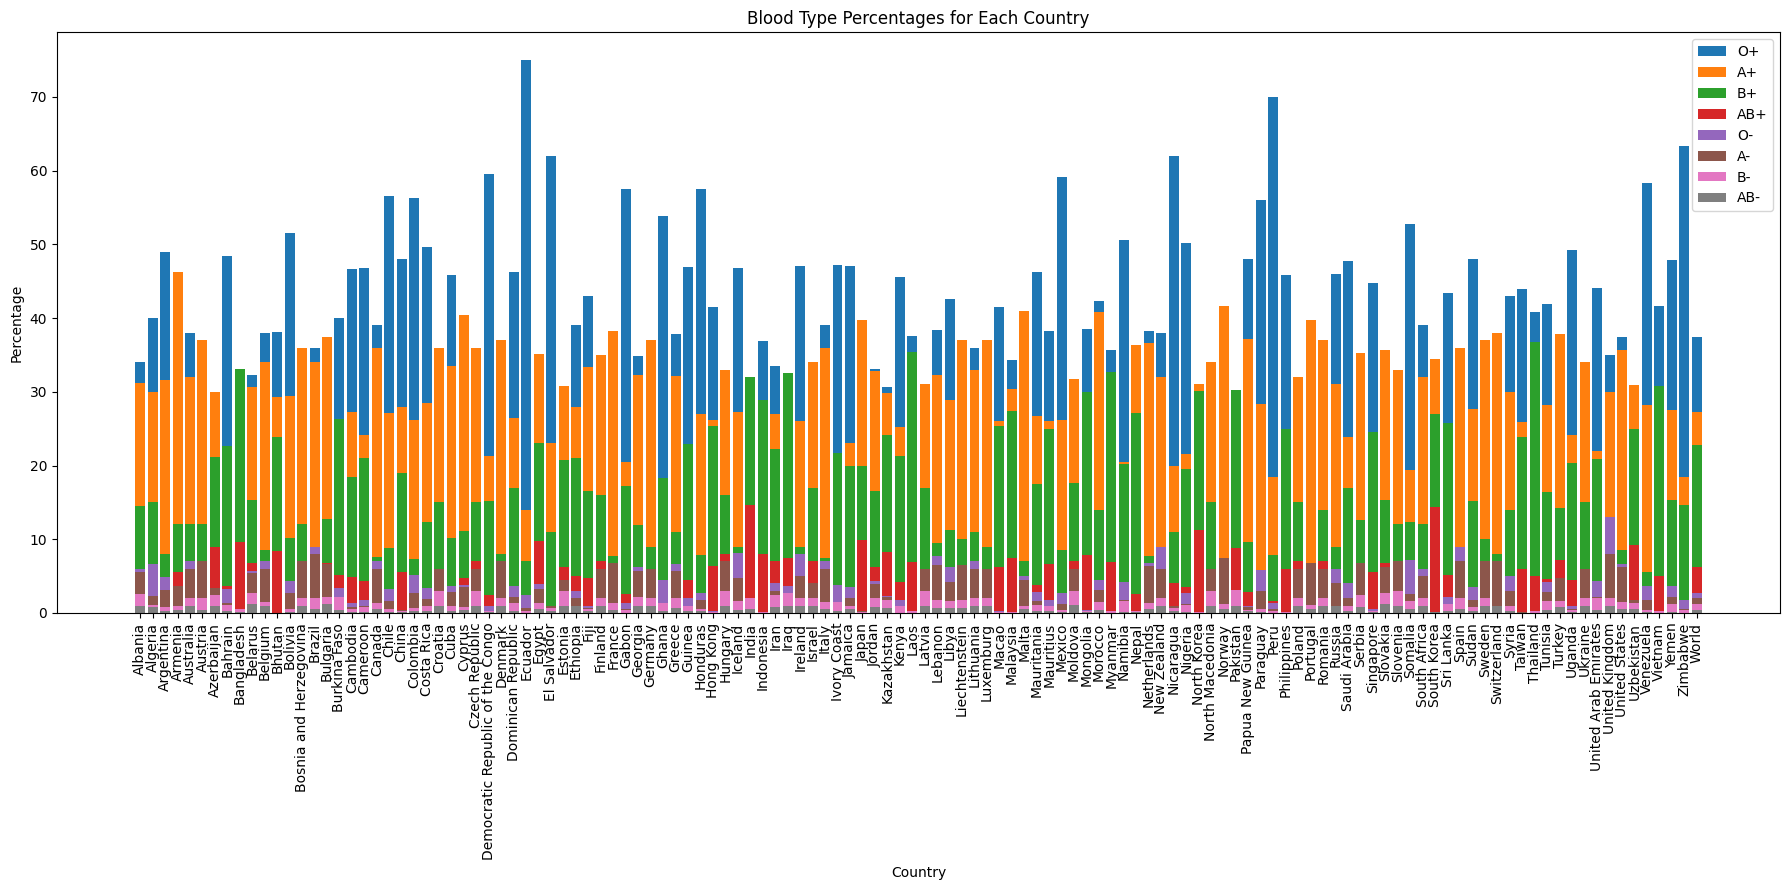

In [ ]:
blood_type_columns = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']

# Plotting bar plot for each blood type percentage
plt.figure(figsize=(18, 9))
for blood_type in blood_type_columns:
    plt.bar(df['Country'], df[blood_type], label=blood_type)

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Blood Type Percentages for Each Country')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

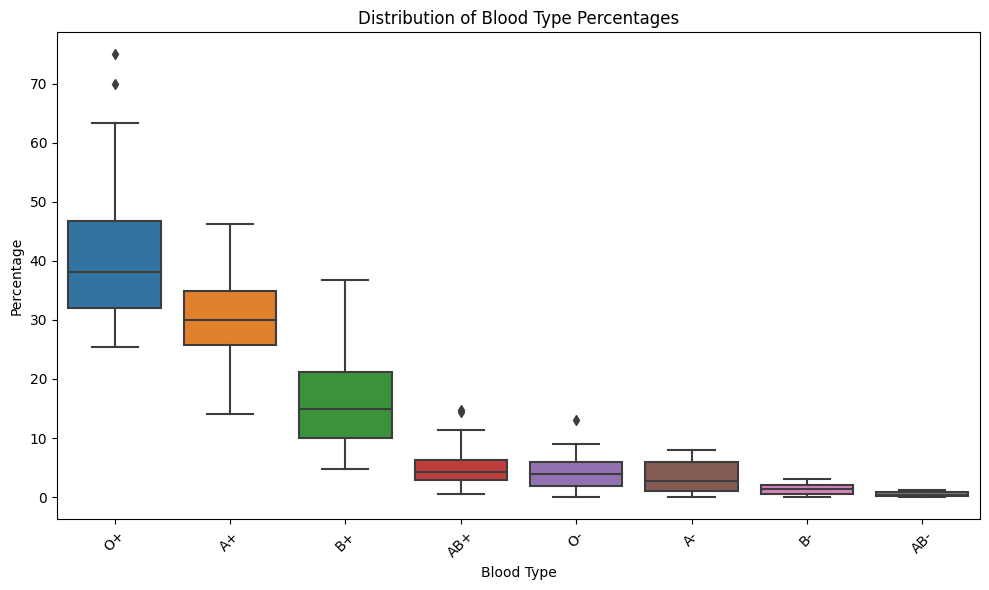

In [ ]:
# Melt the DataFrame to create a 'BloodType' column and a 'Percentage' column
df_melted = df.melt(id_vars='Country', value_vars=blood_type_columns, var_name='BloodType', value_name='Percentage')

# Plotting box plot for each blood type percentage
plt.figure(figsize=(10, 6))
sns.boxplot(x='BloodType', y='Percentage', data=df_melted)
plt.xlabel('Blood Type')
plt.ylabel('Percentage')
plt.title('Distribution of Blood Type Percentages')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-18-ff311190ac64>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 3600x1800 with 0 Axes>

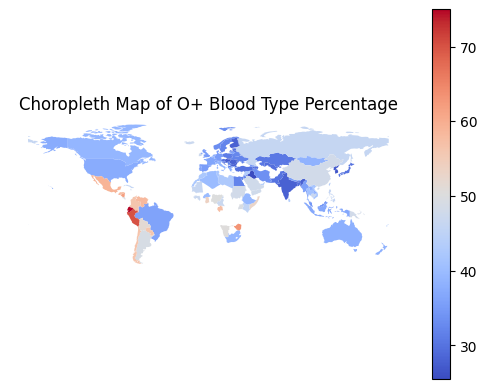

In [ ]:
df['Country'] = df['Country'].replace('United States', 'United States of America')

# Load a world shapefile for mapping
world_shapefile = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


# Merge the shapefile with DataFrame on the 'Country' column
merged_df = world_shapefile.merge(df, left_on='name', right_on='Country', how='left')

# Plot the choropleth map
plt.figure(figsize=(36, 18))
merged_df.plot(column='O+', cmap='coolwarm', legend=True)
plt.title('Choropleth Map of O+ Blood Type Percentage')
plt.axis('off')
plt.show()

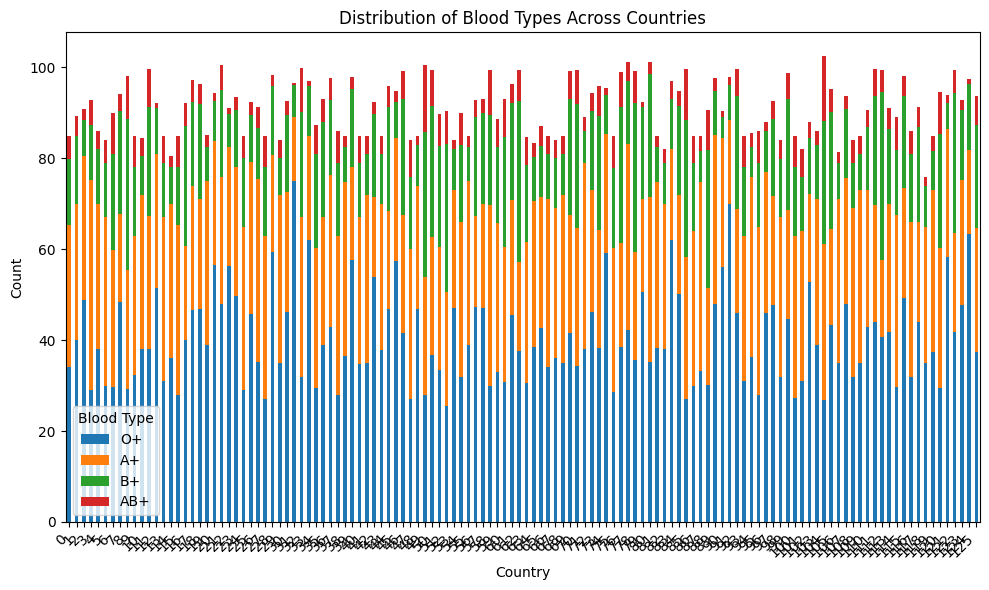

In [ ]:
# Select only the blood type columns
blood_type_columns = ['O+', 'A+', 'B+', 'AB+']
blood_types_df = df[blood_type_columns]

# Create a bar chart to visualize the distribution of blood types
ax = blood_types_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Distribution of Blood Types Across Countries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type')
plt.tight_layout()
plt.show()

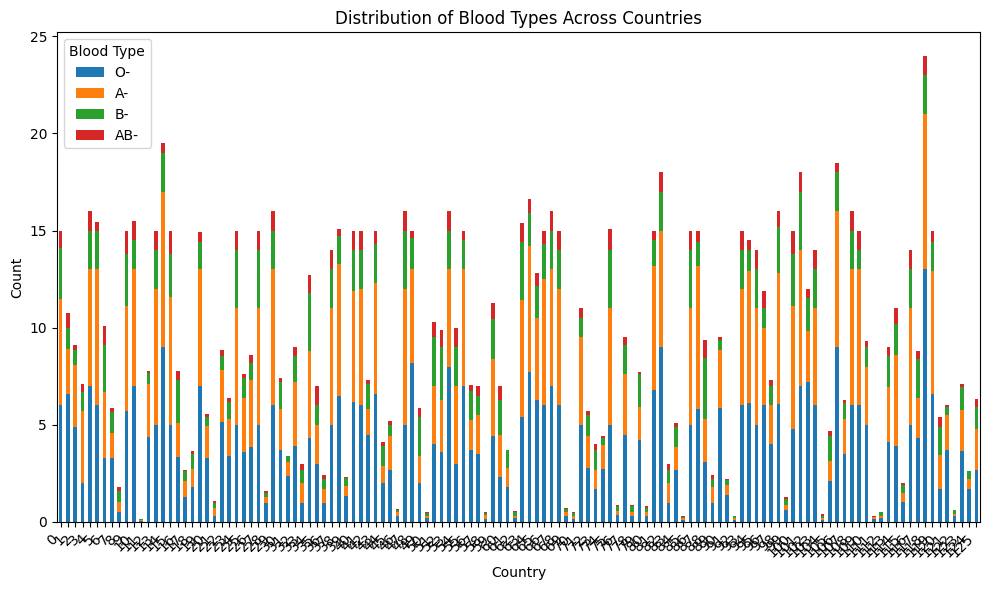

In [ ]:
# Select only the blood type columns
blood_type_columns = ['O-', 'A-', 'B-', 'AB-']
blood_types_df = df[blood_type_columns]

# Create a bar chart to visualize the distribution of blood types
ax = blood_types_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Country')
ax.set_ylabel('Count')
ax.set_title('Distribution of Blood Types Across Countries')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type')
plt.tight_layout()
plt.show()

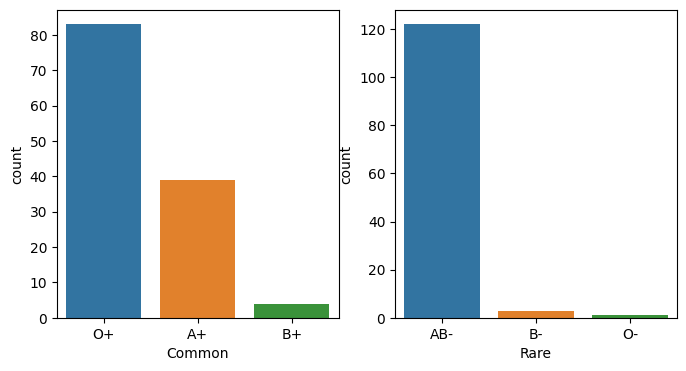

In [ ]:
# This plot shows the  commonest blood type in all the country we have in this dataset
plt.figure(figsize=(8,4));
plt.subplot(1,2,1);
sns.countplot(data=df['Country'], x=df['Common']);
plt.xticks(fontsize=10);

plt.subplot(1,2,2);
sns.countplot(data=df['Country'], x=df['Rare']);
plt.xticks(fontsize=10);

In [ ]:
!pip install pycountry_convert;


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 13.2 MB/s eta 0:00:00


In [ ]:
from pycountry_convert import country_name_to_country_alpha2, country_alpha2_to_continent_code

def get_continent(country_name):
    if pd.notnull(country_name):
        try:
            country_alpha2 = country_name_to_country_alpha2(country_name)
            continent_code = country_alpha2_to_continent_code(country_alpha2)
            return continent_code
        except KeyError:
            return ''
    else:
        return ''

df['Continent'] = df['Country'].apply(get_continent)

/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)


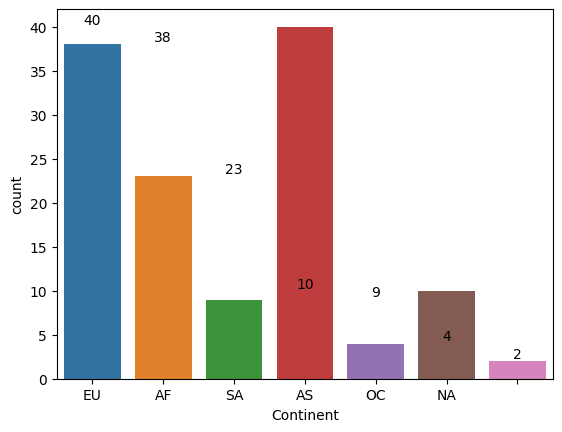

In [ ]:
#This plot shows the variety of Countries in our dataset on each Continent
sns.countplot(data=df, x='Continent')
for i in range(len(df['Continent'].value_counts())):
    plt.text(i, df['Continent'].value_counts()[i], df['Continent'].value_counts()[i],ha='center', va='bottom')

plt.show()

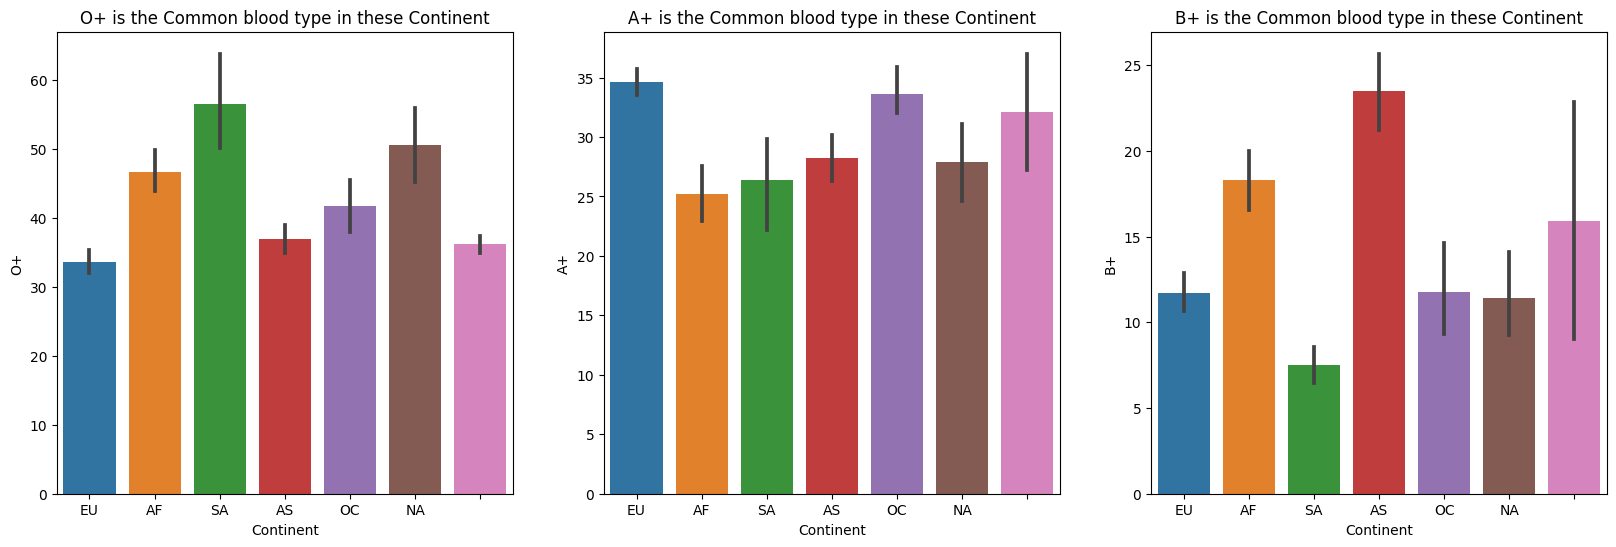

In [ ]:
#This code provides a plot that shows which blood type is Common in each Continent

plt.figure(figsize=(20,6));
plt.subplot(1,3,1);
sns.barplot(data=df,x='Continent', y='O+');
plt.xticks(fontsize=10);
plt.title(label='O+ is the Common blood type in these Continent');


plt.subplot(1,3,2);
sns.barplot(data=df,x='Continent', y='A+');
plt.xticks(fontsize=10);
plt.title(label='A+ is the Common blood type in these Continent');

plt.subplot(1,3,3);
sns.barplot(data=df,x='Continent', y='B+');
plt.xticks(fontsize=10);
plt.title(label='B+ is the Common blood type in these Continent');

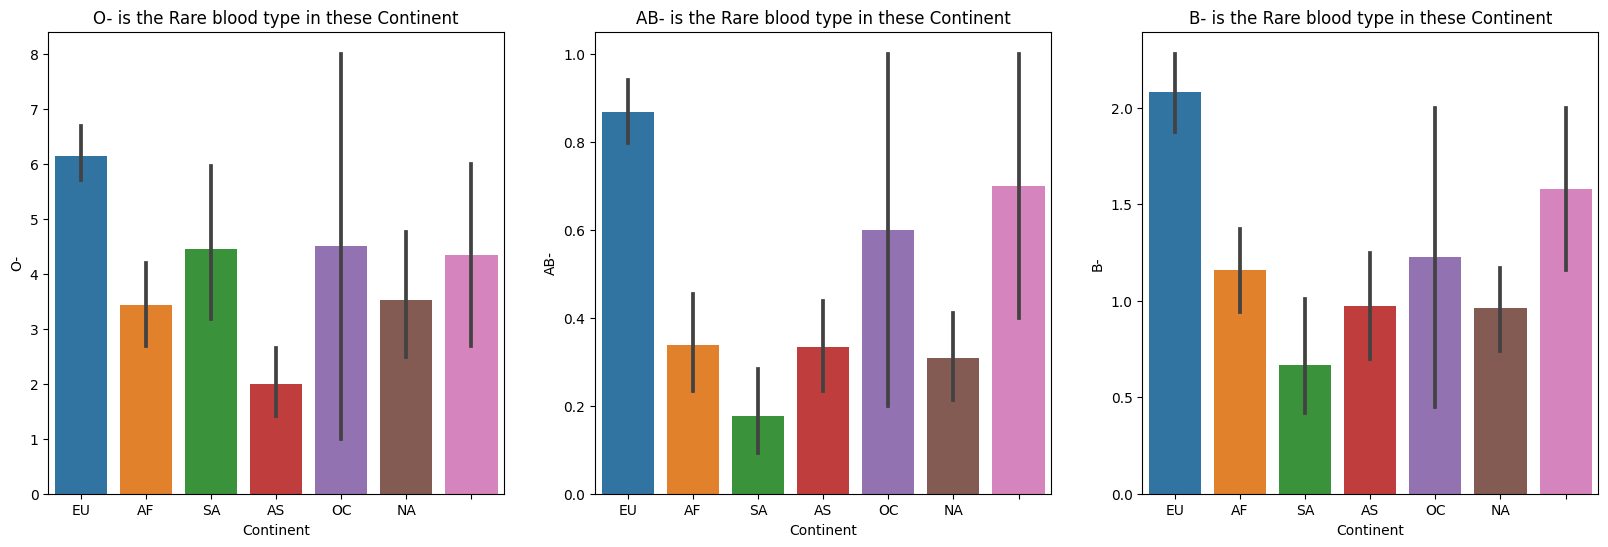

In [ ]:
#This code provides a plot that shows which blood type is Rare in each Continent

plt.figure(figsize=(20,6));
plt.subplot(1,3,1);
sns.barplot(data=df,x='Continent', y='O-');
plt.xticks(fontsize=10);
plt.title(label='O- is the Rare blood type in these Continent');


plt.subplot(1,3,2);
sns.barplot(data=df,x='Continent', y='AB-');
plt.xticks(fontsize=10);
plt.title(label='AB- is the Rare blood type in these Continent');

plt.subplot(1,3,3);
sns.barplot(data=df,x='Continent', y='B-');
plt.xticks(fontsize=10);
plt.title(label='B- is the Rare blood type in these Continent');

In [ ]:
# continent means
grouped_df = merged_df.groupby('continent')[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].mean()
print("Grouped and Aggregated DataFrame:")
print(grouped_df)

Grouped and Aggregated DataFrame:
                                O+         A+         B+       AB+        O-  \
continent                                                                      
Africa                   46.392000  25.567000  17.970000  3.931000  3.617336   
Antarctica                     NaN        NaN        NaN       NaN       NaN   
Asia                     36.155278  28.690556  23.384167  6.929444  2.081389   
Europe                   33.818235  34.275882  11.811765  4.661765  6.243529   
North America            51.054444  28.103333  10.781111  2.670000  3.503333   
Oceania                  41.750000  33.625000  11.775000  3.650000  4.500000   
Seven seas (open ocean)        NaN        NaN        NaN       NaN       NaN   
South America            56.524444  26.353333   7.487778  1.650000  4.453333   

                               A-        B-       AB-  
continent                                              
Africa                   1.947860  1.197720  0.354316

In [ ]:
# continent median
grouped_df1 = merged_df.groupby('continent')[['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']].median()
print("Grouped and Aggregated DataFrame:")
print(grouped_df1)

Grouped and Aggregated DataFrame:
                             O+      A+      B+  AB+    O-    A-     B-    AB-
continent                                                                     
Africa                   46.565  24.675  17.885  4.1  3.43  1.73  1.100  0.200
Antarctica                  NaN     NaN     NaN  NaN   NaN   NaN    NaN    NaN
Asia                     35.210  27.750  24.050  6.9  1.84  1.20  0.935  0.215
Europe                   32.750  34.500  11.500  4.6  6.00  6.00  2.000  1.000
North America            49.700  27.000  10.200  2.9  3.40  1.90  0.900  0.300
Oceania                  40.500  32.650  10.800  3.5  4.00  3.40  1.250  0.600
Seven seas (open ocean)     NaN     NaN     NaN  NaN   NaN   NaN    NaN    NaN
South America            56.300  28.200   7.800  1.6  4.39  2.70  0.490  0.130


<Figure size 1200x600 with 0 Axes>

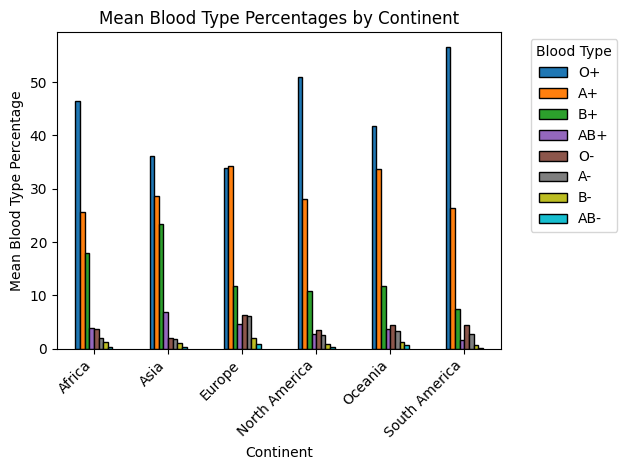

In [ ]:
#Drop rows corresponding to 'Antarctica' and 'Seven seas (open ocean)'
grouped_df.drop(['Antarctica', 'Seven seas (open ocean)'], inplace=True)

# Create the bar plot
plt.figure(figsize=(12, 6))
grouped_df.plot(kind='bar', cmap='tab10', edgecolor='black')
plt.title('Mean Blood Type Percentages by Continent')
plt.xlabel('Continent')
plt.ylabel('Mean Blood Type Percentage')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Blood Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

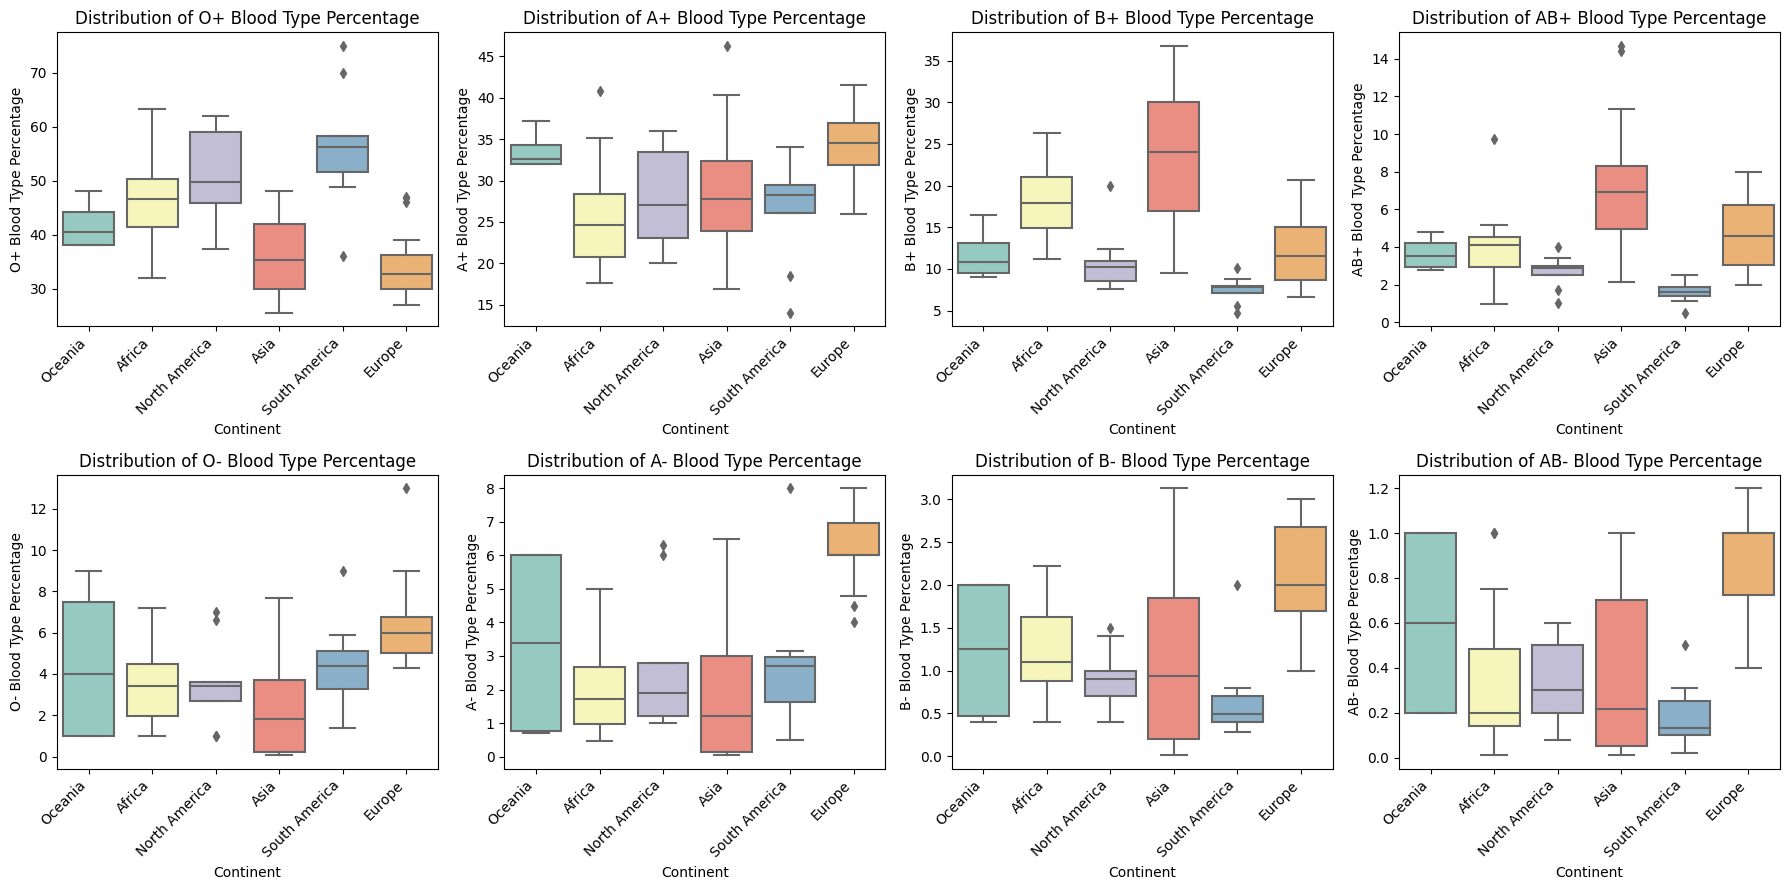

In [ ]:
merged_df = merged_df[~merged_df['continent'].isin(['Antarctica', 'Seven seas (open ocean)'])]


blood_type_cols = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
plt.figure(figsize=(18, 9))

for i, blood_type in enumerate(blood_type_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=merged_df, x='continent', y=blood_type, palette='Set3', fliersize=5)
    plt.title(f'Distribution of {blood_type} Blood Type Percentage')
    plt.xlabel('Continent')
    plt.ylabel(f'{blood_type} Blood Type Percentage')
    plt.tight_layout()

    plt.xticks(rotation=45, ha='right')

plt.show()

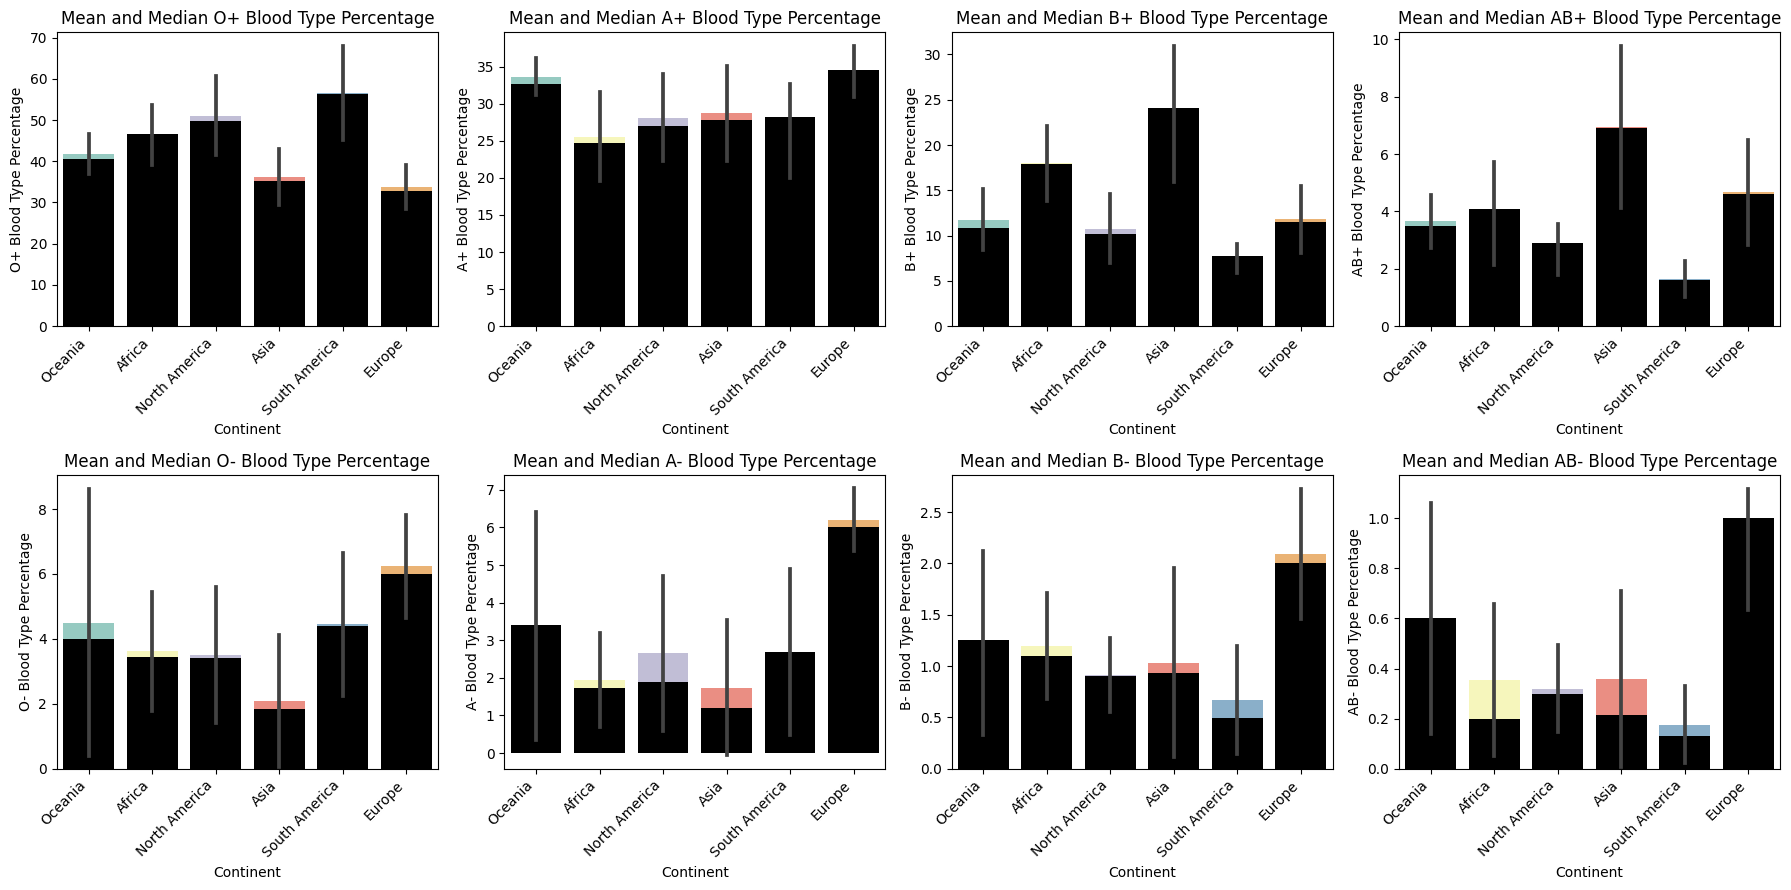

In [ ]:
plt.figure(figsize=(18, 9))

for i, blood_type in enumerate(blood_type_cols, 1):
    plt.subplot(2, 4, i)
    sns.barplot(data=merged_df, x='continent', y=blood_type, estimator='mean', errorbar='sd', palette='Set3')
    sns.barplot(data=merged_df, x='continent', y=blood_type, estimator='median', errorbar=None, color='black')
    plt.title(f'Mean and Median {blood_type} Blood Type Percentage')
    plt.xlabel('Continent')
    plt.ylabel(f'{blood_type} Blood Type Percentage')
    plt.tight_layout()

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

plt.show()

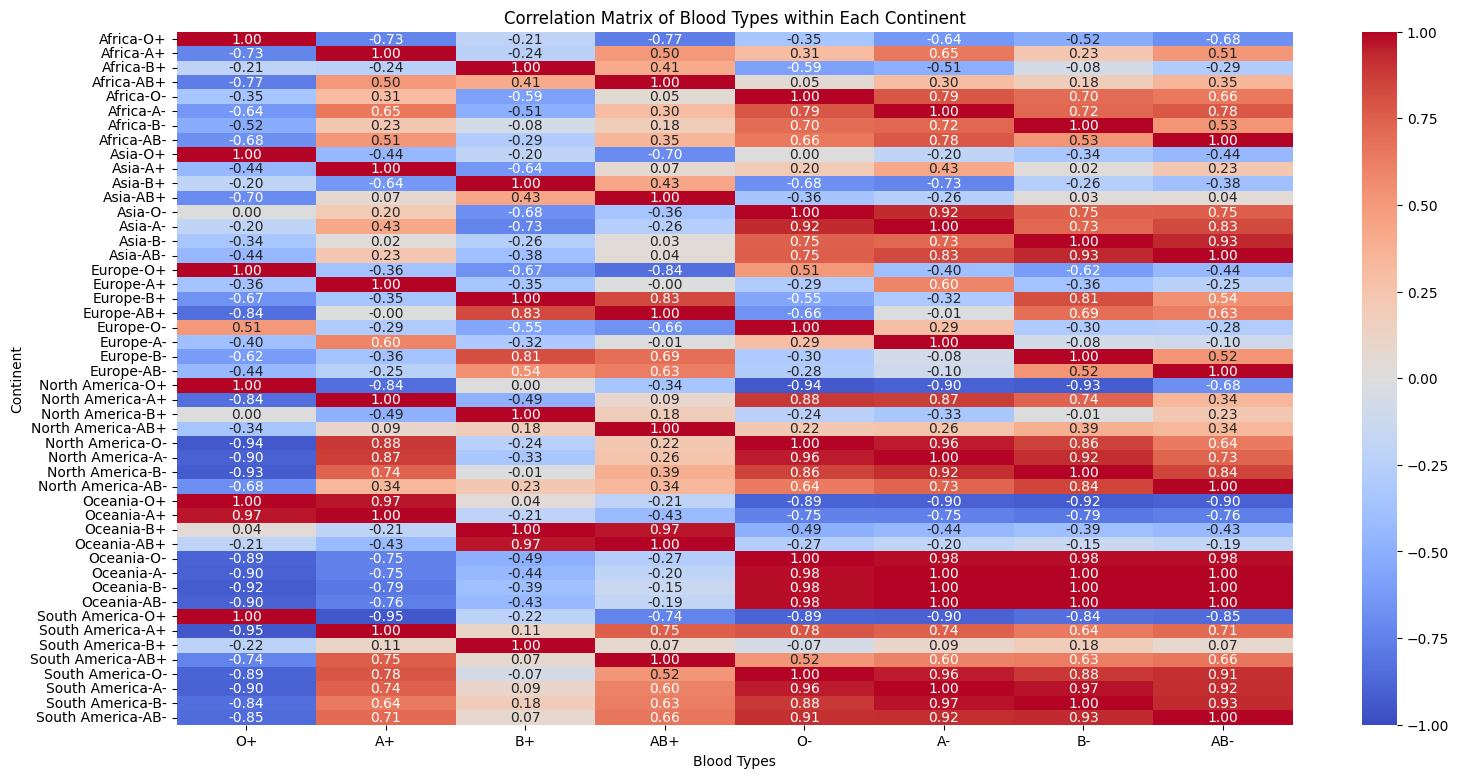

In [ ]:
correlation_matrix = merged_df.groupby('continent')[blood_type_cols].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(18, 9
                   ))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Blood Types within Each Continent')
plt.xlabel('Blood Types')
plt.ylabel('Continent')
plt.show()

In [ ]:
# Calculate the global mean blood type percentages for each blood type
mean_blood_type_cols = ['O+', 'A+', 'B+', 'AB+', 'O-', 'A-', 'B-', 'AB-']
global_mean_blood_type_percentages = df[mean_blood_type_cols].mean()

# Calculate the percentage difference for each continent
for continent in merged_df['continent'].unique():
    print(f"\nContinent: {continent}")
    for blood_type in mean_blood_type_cols:
        continent_mean = merged_df[merged_df['continent'] == continent][blood_type].mean()
        percentage_difference = ((continent_mean - global_mean_blood_type_percentages[blood_type]) / global_mean_blood_type_percentages[blood_type]) * 100
        print(f"Percentage Difference for {blood_type}: {percentage_difference:.2f}%")


Continent: Oceania
Percentage Difference for O+: 3.47%
Percentage Difference for A+: 13.35%
Percentage Difference for B+: -28.22%
Percentage Difference for AB+: -24.39%
Percentage Difference for O-: 14.89%
Percentage Difference for A-: 2.98%
Percentage Difference for B-: -8.20%
Percentage Difference for AB-: 20.89%

Continent: Africa
Percentage Difference for O+: 14.97%
Percentage Difference for A+: -13.81%
Percentage Difference for B+: 9.55%
Percentage Difference for AB+: -18.56%
Percentage Difference for O-: -7.64%
Percentage Difference for A-: -40.56%
Percentage Difference for B-: -10.24%
Percentage Difference for AB-: -28.61%

Continent: North America
Percentage Difference for O+: 26.53%
Percentage Difference for A+: -5.26%
Percentage Difference for B+: -34.28%
Percentage Difference for AB+: -44.69%
Percentage Difference for O-: -10.55%
Percentage Difference for A-: -18.93%
Percentage Difference for B-: -31.72%
Percentage Difference for AB-: -35.53%

Continent: Asia
Percentage Dif

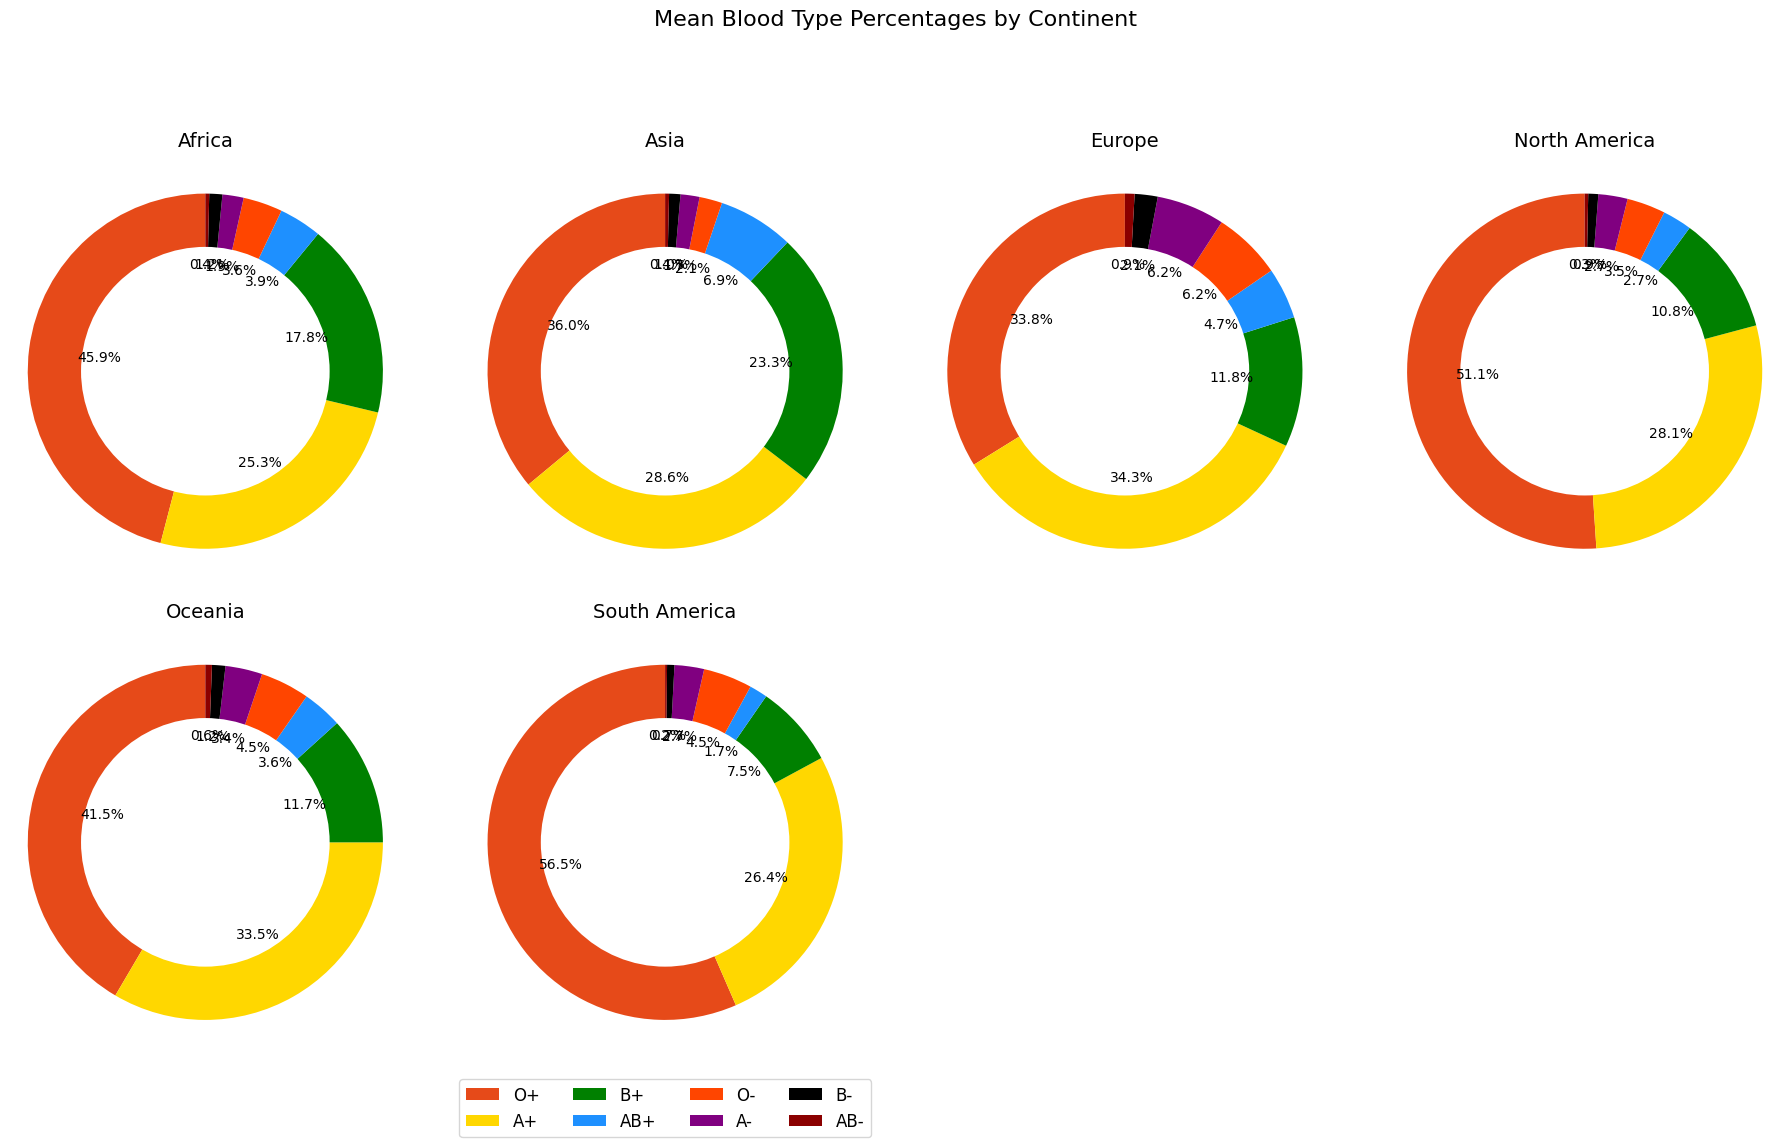

In [ ]:
mean_blood_type_percentages = merged_df.groupby('continent')[mean_blood_type_cols].mean()

plt.figure(figsize=(18, 12))

# List of colors for the blood type categories
colors = ['#E64A19', '#FFD700', '#008000', '#1E90FF', '#FF4500', '#800080', '#000000', '#8B0000']

for i, continent in enumerate(mean_blood_type_percentages.index):
    plt.subplot(2, 4, i+1)
    plt.pie(mean_blood_type_percentages.loc[continent], colors=colors, labels=None, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
    plt.gca().add_artist(plt.Circle((0,0),0.70,fc='white')) # Create a white circle at the center to make it a donut chart
    plt.title(continent, fontsize=14)
    plt.axis('equal') # Equal aspect ratio ensures that the pie chart is drawn as a circle

# Add a common legend for all the donut charts
plt.legend(mean_blood_type_cols, loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, fontsize=12)

plt.suptitle('Mean Blood Type Percentages by Continent', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.92])
plt.show()